<a href="https://colab.research.google.com/github/oba-nijesu/oba-nijesu/blob/main/Blood%20Donation%20Predition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data Exploration

In [ ]:
bd = pd.read_csv('transfusion.csv')
bd

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


## Data Description

In [ ]:
bd.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


## Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns to numerical
categorical_columns = ["Recency (months)", "Frequency (times)", "Monetary (c.c. blood)","Time (months)"]

for col in categorical_columns:
    le = LabelEncoder()
    bd[col] = le.fit_transform(bd[col])

# Print the first few rows of the updated DataFrame
print(bd.head())

   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 32                     32             77   
1                 0                 12                     12             21   
2                 1                 15                     15             28   
3                 2                 19                     19             37   
4                 1                 23                     23             65   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0  


## Exploratory Data Analysis

In [ ]:
correlation_matrix = bd.corr()
correlation_matrix

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.195202,-0.195202,0.142497,-0.301357
Frequency (times),-0.195202,1.000000,1.000000,0.654902,0.218976
Monetary (c.c. blood),-0.195202,1.000000,1.000000,0.654902,0.218976
Time (months),0.142497,0.654902,0.654902,1.000000,-0.037382
whether he/she donated blood in March 2007,-0.301357,0.218976,0.218976,-0.037382,1.000000


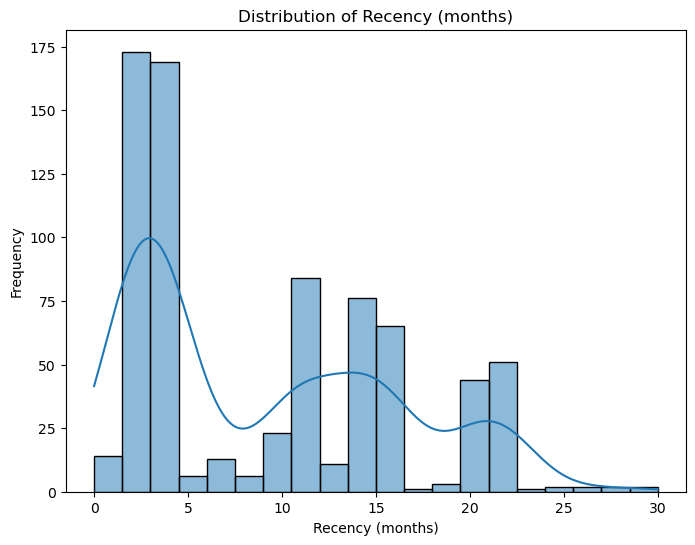

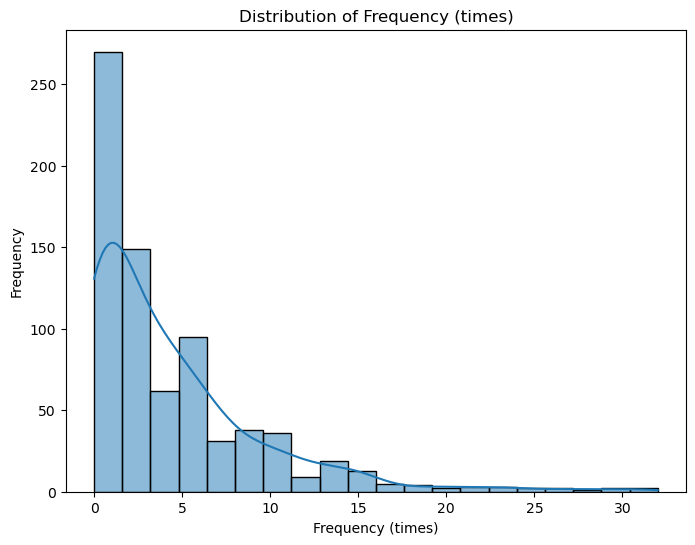

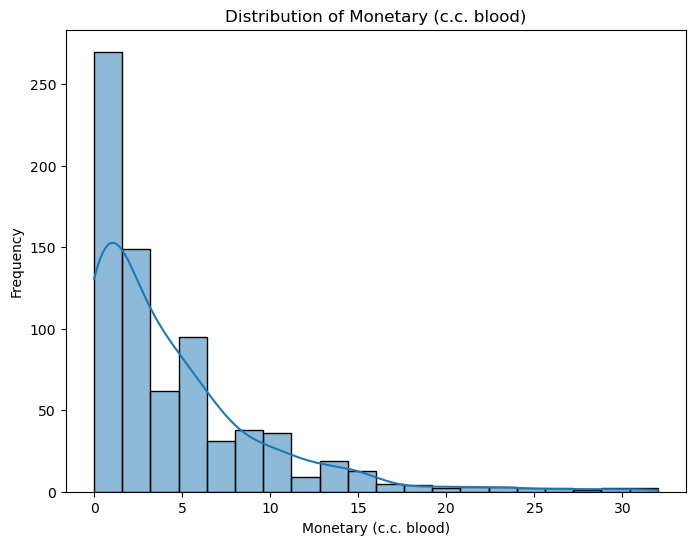

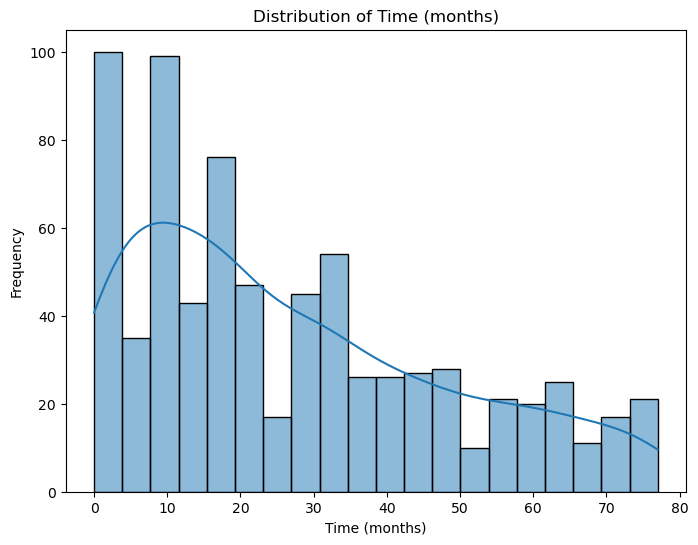

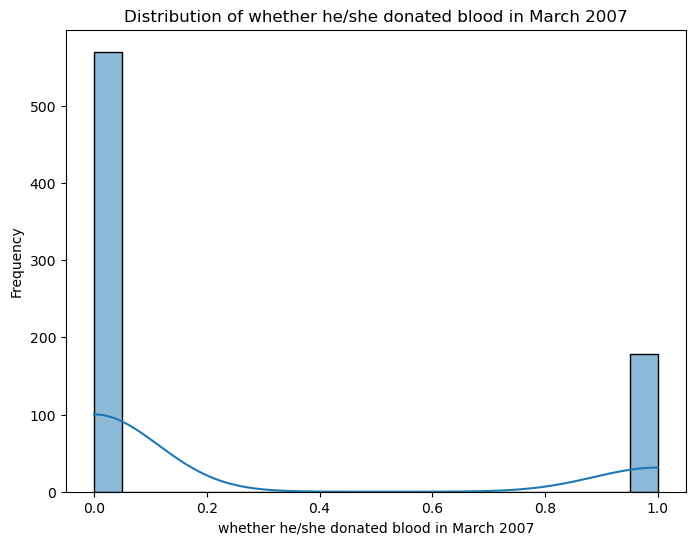

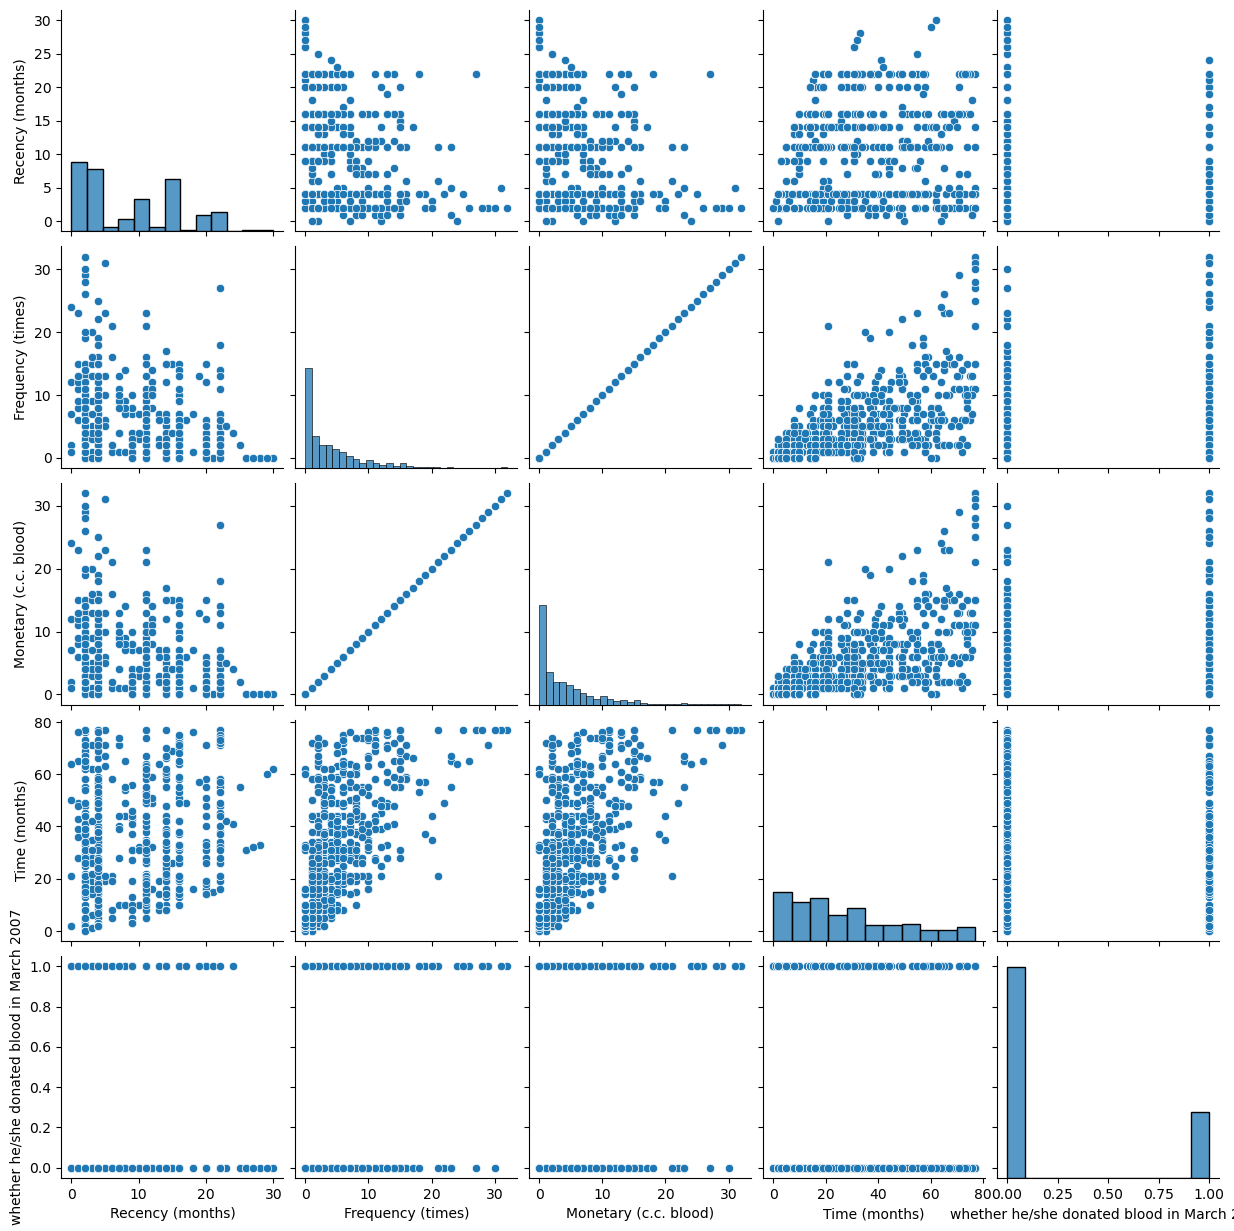

In [ ]:
numerical_columns = bd.select_dtypes(include=["float64", "int64"]).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(bd[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Pairplot for numerical features
sns.pairplot(bd[numerical_columns])
plt.show()

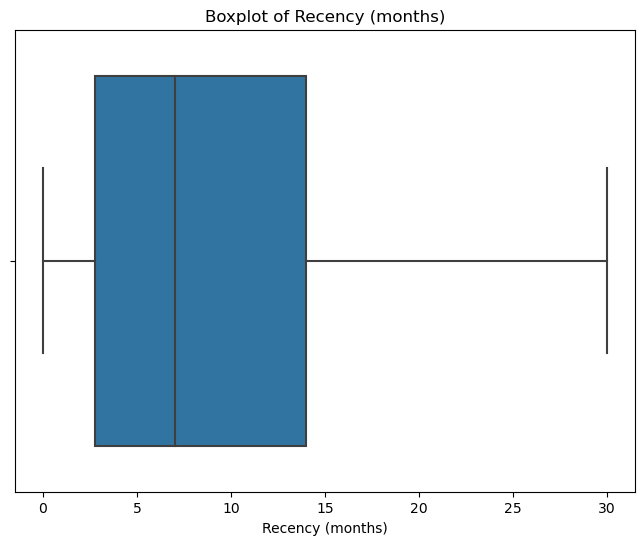

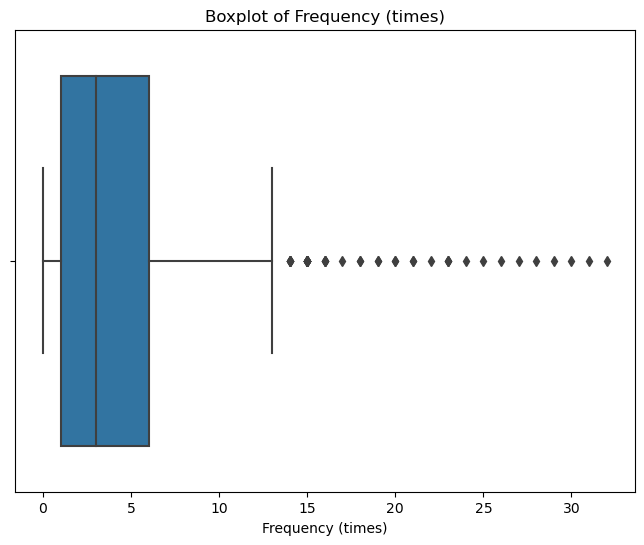

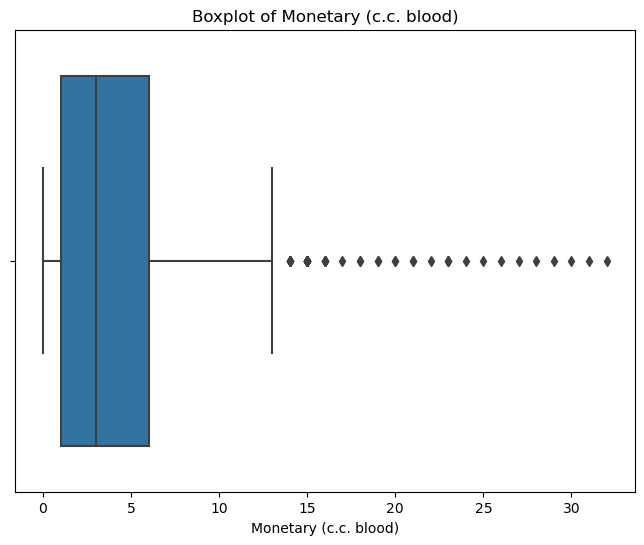

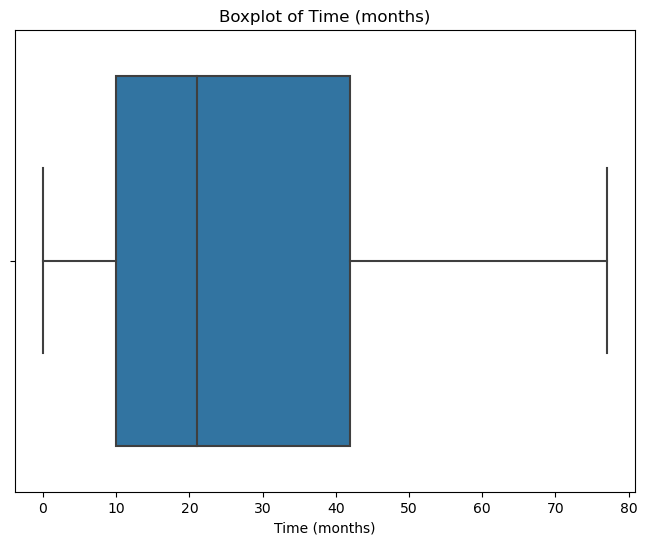

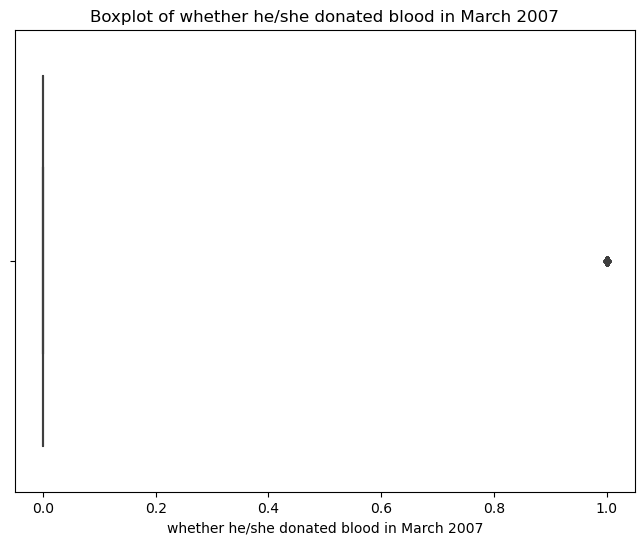

In [ ]:
# Boxplot for potential outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=bd[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

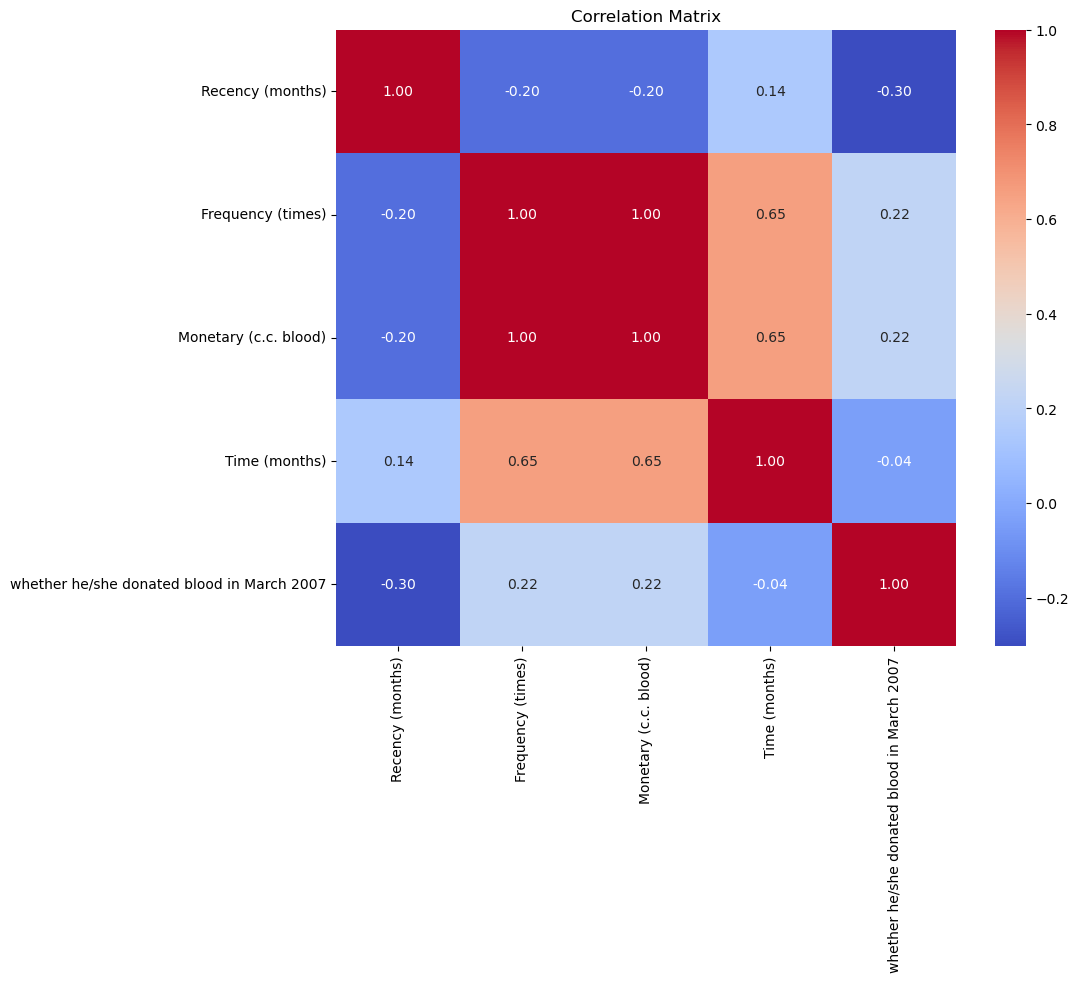

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Model Building

In [ ]:
x = bd.drop('whether he/she donated blood in March 2007',axis = 1)
x

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,32,32,77
1,0,12,12,21
2,1,15,15,28
3,2,19,19,37
4,1,23,23,65
...,...,...,...,...
743,22,1,1,31
744,20,1,1,44
745,22,2,2,53
746,27,0,0,32


In [ ]:
y = bd['whether he/she donated blood in March 2007']
y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: whether he/she donated blood in March 2007, Length: 748, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Importing Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
#models
log_reg = LogisticRegression()
dtc = DecisionTreeClassifier()
clf = RandomForestClassifier(n_estimators=100)
gbc = GradientBoostingClassifier()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()

In [ ]:
#Training the models
log_reg.fit(x_train, y_train)
dtc.fit(x_train, y_train)
clf.fit(x_train, y_train)
gbc.fit(x_train, y_train)
svc.fit(x_train, y_train)
knn.fit(x_train, y_train)
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
#predicting
log_reg_pred = log_reg.predict(x_test)
dtc_pred = dtc.predict(x_test)
clf_pred = clf.predict(x_test)
gbc_pred = gbc.predict(x_test)
svc_pred = svc.predict(x_test)
knn_pred = knn.predict(x_test)
gnb_pred = gnb.predict(x_test)

In [ ]:
# Creating a dictionary for the models
models = {
    'LogisticRegression': log_reg_pred,
    'DecisionTreeClassifier': dtc_pred,
    'RandomForestClassifier': clf_pred,
    'GradientBoostingClassifier': gbc_pred,
    'SVC': svc_pred,
    'KNeighborsClassifier': knn_pred,
    'GaussianNB': gnb_pred,
}

## Model Scoring

In [ ]:
#Models performance
for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print()

Model: LogisticRegression
Accuracy: 0.7533
Precision: 0.5000
Recall: 0.1081
F1 Score: 0.1778
Confusion Matrix:
 [[109   4]
 [ 33   4]]

Model: DecisionTreeClassifier
Accuracy: 0.6533
Precision: 0.2581
Recall: 0.2162
F1 Score: 0.2353
Confusion Matrix:
 [[90 23]
 [29  8]]

Model: RandomForestClassifier
Accuracy: 0.7267
Precision: 0.4091
Recall: 0.2432
F1 Score: 0.3051
Confusion Matrix:
 [[100  13]
 [ 28   9]]

Model: GradientBoostingClassifier
Accuracy: 0.7733
Precision: 0.6154
Recall: 0.2162
F1 Score: 0.3200
Confusion Matrix:
 [[108   5]
 [ 29   8]]

Model: SVC
Accuracy: 0.7533
Precision: 0.5000
Recall: 0.0541
F1 Score: 0.0976
Confusion Matrix:
 [[111   2]
 [ 35   2]]

Model: KNeighborsClassifier
Accuracy: 0.7800
Precision: 0.6000
Recall: 0.3243
F1 Score: 0.4211
Confusion Matrix:
 [[105   8]
 [ 25  12]]

Model: GaussianNB
Accuracy: 0.7533
Precision: 0.5000
Recall: 0.1892
F1 Score: 0.2745
Confusion Matrix:
 [[106   7]
 [ 30   7]]

